In [1]:
from recycling_app.model.nn_classifier import NNClassifier
from recycling_app.preprocessing.preprocessing import Preprocessor
from recycling_app.preprocessing.loading_data import create_data_loaders
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import os
from torchvision import datasets

In [ ]:
# %load_ext autoreload
# %autoreload 0

In [2]:
random_seed = 125

In [3]:
def plot_confusion_matrix(y_pred, y_true, dataset):
    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [4]:
features_path = os.path.join(os.path.dirname(os.getcwd()), "data", "features")

In [5]:
dataset_path = os.path.join(os.path.dirname(os.getcwd()), "data", "raw")
dataset = datasets.ImageFolder(dataset_path)
classes = dataset.classes

In [6]:
train_features = torch.load(os.path.join(features_path, "train_features_resnet152.pt"))
train_labels = torch.load(os.path.join(features_path, "train_labels_resnet152.pt"))
val_features = torch.load(os.path.join(features_path, "val_features_resnet152.pt"))
val_labels = torch.load(os.path.join(features_path, "val_labels_resnet152.pt"))
test_features = torch.load(os.path.join(features_path, "test_features_resnet152.pt"))
test_labels = torch.load(os.path.join(features_path, "test_labels_resnet152.pt"))

C:\Users\alicj\AppData\Local\Temp\ipykernel_19696\2986065404.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_features = torch.load(os.path.join(features_path, "tra

In [7]:
train_features.shape

(4659, 2048)

In [23]:
nn_clf = NNClassifier(input_size=2048, hidden_size=256, output_size=len(classes), dropout=0.0)

In [24]:
train_loss_history = nn_clf.fit(train_features, train_labels, 50, 0.0001)

Epoch 31/50, Avg Train Loss: 0.021253634705917818:  62%|██████▏   | 31/50 [10:42<06:33, 20.71s/it]


KeyboardInterrupt: 

In [25]:
pred, prob = nn_clf.predict(val_features)

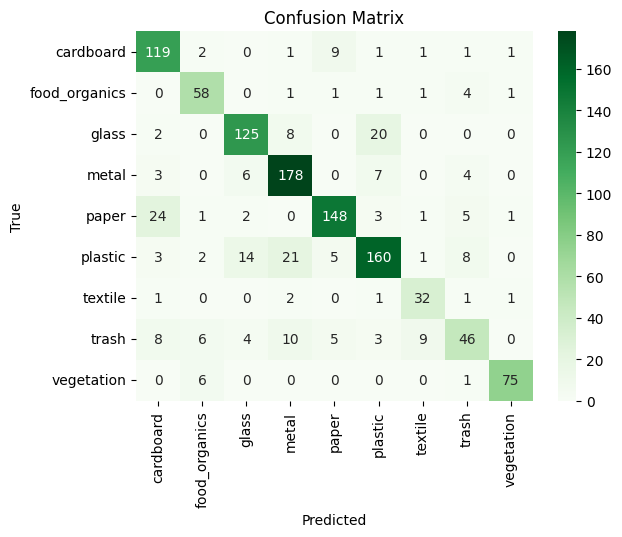

In [26]:
plot_confusion_matrix(pred, val_labels, dataset)

In [27]:
print(classification_report(val_labels, pred, target_names=classes))

               precision    recall  f1-score   support

    cardboard       0.74      0.88      0.81       135
food_organics       0.77      0.87      0.82        67
        glass       0.83      0.81      0.82       155
        metal       0.81      0.90      0.85       198
        paper       0.88      0.80      0.84       185
      plastic       0.82      0.75      0.78       214
      textile       0.71      0.84      0.77        38
        trash       0.66      0.51      0.57        91
   vegetation       0.95      0.91      0.93        82

     accuracy                           0.81      1165
    macro avg       0.80      0.81      0.80      1165
 weighted avg       0.81      0.81      0.81      1165



In [28]:
models_path = os.path.join(os.path.dirname(os.getcwd()), "recycling_app", "model")

In [29]:
torch.save(nn_clf, os.path.join(models_path, "nn_classifier_resnet152.pth"))